In [83]:
# enable to update the pmax evolution table, otherwise turn it off as it breaks the rest
# PMAX_EVOLUTION = True
PMAX_EVOLUTION = False

In [84]:
import pandas as pd
pd.set_option('display.max_rows', 10)

# Read the CSV file
df = pd.read_csv('hardware_merged.csv')
asicminervalue_with_date = pd.read_csv('asicminervalue_with_date.csv')
asicminervalue_with_date = asicminervalue_with_date.drop(columns=['hardware_index'])

# drop duplicate hardware_name rows in asicminervalue_with_date
asicminervalue_with_date = asicminervalue_with_date.drop_duplicates(subset='hardware_name', keep='first')

# lowercase values in asicminervalue_with_date
asicminervalue_with_date['hardware_name'] = asicminervalue_with_date['hardware_name'].str.lower()
asicminervalue_with_date['hardware_name'] = asicminervalue_with_date['hardware_name'].str.replace("bitmain ","")
asicminervalue_with_date.rename(columns={'hardware_release_date': 'release_date'}, inplace=True)


# Sort the dataframe by efficiency (Mhash/J) in descending order
df_sorted = df.sort_values(by='Mhash/J', ascending=True)

In [85]:
df_sorted # hardware_name	Mhash/J

,hardware_name,Mhash/J
41,8400 gs,0.013000
45,9400gt,0.067000
220,ion,0.067000
265,quadro nvs 295,0.070000
0,3410,0.074000
...,...,...
251,microbt whatsminer m60,50263.004091
103,antminer t21,52631.578947
252,microbt whatsminer m60s,54054.054054
86,antminer s21,56338.028169


In [86]:
asicminervalue_with_date # 	hardware_name	hardware_release_date


,hardware_name,release_date
0,antminer s21 hyd,Feb 2024
1,antminer s21,Feb 2024
2,microbt whatsminer m60s,Feb 2024
3,antminer t21,Feb 2024
4,microbt whatsminer m60,Feb 2024
...,...,...
122,antminer r4,Feb 2017
124,antminer s7-ln,Jun 2016
126,antminer s7,Sep 2015
127,antminer s5,Dec 2014


In [87]:
# left join
result = pd.merge(df_sorted, asicminervalue_with_date, on='hardware_name', how='left')
result

,hardware_name,Mhash/J,release_date
0,8400 gs,0.013000,NaN
1,9400gt,0.067000,NaN
2,ion,0.067000,NaN
3,quadro nvs 295,0.070000,NaN
4,3410,0.074000,NaN
...,...,...,...
287,microbt whatsminer m60,50263.004091,Feb 2024
288,antminer t21,52631.578947,Feb 2024
289,microbt whatsminer m60s,54054.054054,Feb 2024
290,antminer s21,56338.028169,Feb 2024


In [88]:
result.to_csv('paper_list.csv', index=False)

In [89]:
# take rows where Mhash/J < 10.3
gpus = result[result['Mhash/J'] < 10.3]
gpus = gpus[["hardware_name"]]
gpus.to_csv('gpu_list.csv', index=False)

In [90]:
gpu_and_date = pd.read_csv('gpu_and_date.csv',delimiter=';')
gpu_and_date # hardware_name	release_date

,hardware_name,release_date
0,8400 gs,"Jul 12th, 2010"
1,9400gt,"Jun 13th, 2012"
2,ion,unknown
3,quadro nvs 295,"May 7th, 2009"
4,3410,"May 7th, 2009"
...,...,...
88,5970,"Nov 18th, 2009"
89,7770,"Feb 15th, 2012"
90,7750,"Feb 15th, 2012"
91,7870 xt,"Nov 19th, 2012"


In [91]:
# left join
result = pd.merge(result, gpu_and_date, on='hardware_name', how='left') # hardware_name	Mhash/J	release_date_x	release_date_y
# merge the two release_date columns
result['release_date'] = result['release_date_x'].combine_first(result['release_date_y'])
result = result.drop(columns=['release_date_x', 'release_date_y'])
result.to_csv('paper_list.csv', index=False)
result

,hardware_name,Mhash/J,release_date
0,8400 gs,0.013000,"Jul 12th, 2010"
1,9400gt,0.067000,"Jun 13th, 2012"
2,ion,0.067000,unknown
3,quadro nvs 295,0.070000,"May 7th, 2009"
4,3410,0.074000,"May 7th, 2009"
...,...,...,...
287,microbt whatsminer m60,50263.004091,Feb 2024
288,antminer t21,52631.578947,Feb 2024
289,microbt whatsminer m60s,54054.054054,Feb 2024
290,antminer s21,56338.028169,Feb 2024


In [92]:
hardware_instances = pd.read_csv('../bitcoinforum/5_processing_extracted_data/hardware_instances_with_efficiency.csv') # date	hardware TH/J
hardware_instances.rename(columns = {'hardware':'hardware_name'}, inplace = True)
hardware_instances.rename(columns = {'date':'date_used'}, inplace = True)
hardware_instances.drop(columns=['TH/J'], inplace=True)
hardware_instances

,date_used,hardware_name
0,2010-09-09 12:59:39,gtx460
1,2010-10-06 20:25:17,4350
2,2010-10-06 20:25:17,5770
3,2010-10-06 20:25:17,5870
4,2010-10-06 20:25:17,gtx260
...,...,...
14530,2023-12-17 03:45:25,microbt whatsminer m30s
14531,2023-12-17 03:45:25,microbt whatsminer m50s
14532,2023-12-17 03:45:25,microbt whatsminer m50s
14533,2023-12-17 03:45:25,microbt whatsminer m50s


In [93]:
# # for each thing in "result", find the first date in hardware_instances
# result['first_date_used'] = None
# for index, row in result.iterrows():
#     hardware_name = row['hardware_name']
#     release_date = hardware_instances[hardware_instances['hardware_name'] == hardware_name]['date_used'].min()
#     result.at[index, 'first_date_used'] = release_date

# for each thing in "result", find the first date in hardware_instances that comes after the release date
result['first_date_used'] = None
for index, row in result.iterrows():
    hardware_name = row['hardware_name']
    release_date = row['release_date']
    release_date = pd.to_datetime(release_date, errors='coerce')
    if release_date is not pd.NaT:
        date_used = hardware_instances[hardware_instances['hardware_name'] == hardware_name]['date_used']
        # Convert 'date_used' and 'release_date' to datetime
        date_used = pd.to_datetime(date_used, errors='coerce')
        date_used = date_used[date_used >= release_date].min()
        result.at[index, 'first_date_used'] = str(date_used).replace("NaT","*")
    else:
        release_date = hardware_instances[hardware_instances['hardware_name'] == hardware_name]['date_used'].min()
        result.at[index, 'first_date_used'] = release_date



In [94]:
# replace dates like Mar 4th, 2009 with Mar 2009
result["release_date"] = result["release_date"].str.replace(r'(\w{3}) \d{1,2}(?:th|st|nd|rd), (\d{4})', r'\1 \2', regex=True)
# in first_date_used, remove the time
result["first_date_used"] = result["first_date_used"].str.split(" ").str[0]
# replace "unknown" with "*"
result["release_date"] = result["release_date"].replace("unknown", "*")
# replace NaN with "*"
result["first_date_used"] = result["first_date_used"].replace(float('nan'), "*")
result["release_date"] = result["release_date"].replace(float('nan'), "*")

In [95]:
# add type columns: GPU if Mhash/J < 10.3, ASIC otherwise
result['type'] = None
for index, row in result.iterrows():
    if row['Mhash/J'] < 10.3:
        result.at[index, 'type'] = 'GPU'
    else:
        result.at[index, 'type'] = 'ASIC'

In [96]:
# convert efficiency to TH/J and scientific notation
result['TH/J'] = result['Mhash/J'] / 1e6
result['TH/J'] = result['TH/J'].apply(lambda x: '%.2E' % x)
result = result[['type', 'hardware_name', 'release_date', 'first_date_used', 'TH/J']]
result = result.rename(columns={"hardware_name": "Hardware name"})
result = result.rename(columns={"type": "Type"})
result = result.rename(columns={"release_date": "Release date"})
result = result.rename(columns={"first_date_used": "First date used"})
result = result.rename(columns={"TH/J": "Eff. (TH/J)"})
# Make first hardware_name letter uppercase
result['Hardware name'] = result['Hardware name'].str.capitalize()
# if hardware_name starts with "Gtx", replace with "GTX"
result['Hardware name'] = result['Hardware name'].str.replace("Gtx", "GTX")
result['Hardware name'] = result['Hardware name'].str.replace("Gts", "GTS")
result['Hardware name'] = result['Hardware name'].str.replace("Gt", "GT")


In [97]:
print("corrections = [")
for row in result.iterrows():
    release_date = row[1]['Release date']
    if release_date == "*":
        print("{" + f"""
    'Hardware name': '{row[1]['Hardware name']}', 'Release date': "" # First date used = {row[1]['First date used']}
    """.strip().replace("#","},#"))
print("]")

corrections = [
{'Hardware name': 'Ion', 'Release date': "" },# First date used = 2011-07-06
{'Hardware name': 'Quadro nvs 135m', 'Release date': "" },# First date used = *
{'Hardware name': '8800gts', 'Release date': "" },# First date used = 2011-03-08
{'Hardware name': 'Quadro fx 1600m', 'Release date': "" },# First date used = *
{'Hardware name': '8800 gts', 'Release date': "" },# First date used = 2011-05-23
{'Hardware name': '9600gso512', 'Release date': "" },# First date used = 2011-05-28
{'Hardware name': '9600gt', 'Release date': "" },# First date used = 2011-06-10
{'Hardware name': '9800gx2', 'Release date': "" },# First date used = 2011-04-14
{'Hardware name': '9800gtx', 'Release date': "" },# First date used = 2012-09-27
{'Hardware name': '9600gso', 'Release date': "" },# First date used = 2011-05-22
{'Hardware name': 'GTX280', 'Release date': "" },# First date used = 2011-04-25
{'Hardware name': 'GTX260c216', 'Release date': "" },# First date used = 2011-05-23
{'Hardware na

In [98]:
corrections = [
{'Hardware name': 'Ion', 'Release date': 'February 2009' },# First date used = 2011-07-06
{'Hardware name': 'Quadro nvs 135m', 'Release date': 'May 9th, 2007' },# First date used = *
{'Hardware name': '8800gts', 'Release date': 'Feb 12th, 2007' },# First date used = 2011-03-08
{'Hardware name': 'Quadro fx 1600m', 'Release date': "Jun 1st, 2007" },# First date used = *
{'Hardware name': '8800 gts', 'Release date': "Feb 12th, 2007" },# First date used = 2011-05-23
{'Hardware name': '9600gso512', 'Release date': "Oct 23rd, 2008" },# First date used = 2011-05-28
{'Hardware name': '9600gt', 'Release date': "Feb 21st, 2008" },# First date used = 2011-06-10
{'Hardware name': '9800gx2', 'Release date': "Feb 21st, 2008" },# First date used = 2011-04-14
{'Hardware name': '9800gtx', 'Release date': "May 27th, 2009" },# First date used = 2012-09-27
{'Hardware name': '9600gso', 'Release date': "Apr 28th, 2008" },# First date used = 2011-05-22
{'Hardware name': 'GTX280', 'Release date': "Jun 16th, 2008" },# First date used = 2011-04-25
{'Hardware name': 'GTX260c216', 'Release date': "Sep 16th, 2008" },# First date used = 2011-05-23
{'Hardware name': 'Quadro nvs 3100m', 'Release date': "Jul 23rd, 2013" },# First date used = *
{'Hardware name': '9800gt ee', 'Release date': "Jul 21st, 2008" },# First date used = *
{'Hardware name': '8800gt', 'Release date': "Oct 29th, 2007" },# First date used = 2010-12-23
{'Hardware name': '9800gt', 'Release date': "Jul 21st, 2008" },# First date used = 2011-05-16
{'Hardware name': '4550', 'Release date': "Sep 30th, 2008" },# First date used = 2012-04-19
{'Hardware name': '4570m', 'Release date': "Jan 9th, 2009" },# First date used = 2012-09-13
{'Hardware name': '9400m', 'Release date': "Oct 15th, 2008" },# First date used = 2011-06-24
{'Hardware name': 'GTX 560m', 'Release date': "May 30th, 2011" },# First date used = *
{'Hardware name': 'Quadro fx 2000m', 'Release date': "Jan 13th, 2011" },# First date used = *
{'Hardware name': 'Quadro fx 3600m', 'Release date': "Feb 23rd, 2008" },# First date used = *
{'Hardware name': '6310m', 'Release date': "Nov 9th, 2010" },# First date used = 2013-05-17
{'Hardware name': '5450', 'Release date': "Jan 7th, 2010" },# First date used = 2012-01-25
{'Hardware name': '5550', 'Release date': "Feb 9th, 2010" },# First date used = 2011-07-27
{'Hardware name': 'GTS 350m', 'Release date': "Jan 7th, 2010" },# First date used = *
{'Hardware name': '5650', 'Release date': "Jan 7th, 2010" },# First date used = 2011-04-15
{'Hardware name': '5670', 'Release date': "Jan 14th, 2010" },# First date used = 2011-05-08
{'Hardware name': '5570', 'Release date': "Feb 9th, 2010" },# First date used = 2011-02-28
{'Hardware name': 'Bitforce sha256 single', 'Release date': "May 2012" },# First date used = 2012-05-09
{'Hardware name': 'Bitcoin dominator x5000', 'Release date': "January 30, 2013" },# First date used = *
{'Hardware name': 'Lancelot', 'Release date': "February 11, 2013" },# First date used = 2013-02-02
{'Hardware name': 'Icarus', 'Release date': "November 9, 2011" },# First date used = 2011-12-04
{'Hardware name': 'Modminer quad', 'Release date': "2012-06-28" },# First date used = 2012-06-28
{'Hardware name': 'Butterflylabs mini rig', 'Release date': "May 14, 2012" },# First date used = 2012-05-14
{'Hardware name': 'X6500 fpga miner', 'Release date': "2011-08-30" },# First date used = 2011-08-30
{'Hardware name': 'Avalon batch 1', 'Release date': "2013-01-13" },# First date used = 2013-01-13
{'Hardware name': 'Avalon batch 3', 'Release date': "2013-03-25" },# First date used = 2013-03-25
{'Hardware name': 'Avalon batch 2', 'Release date': "2013-02-26" },# First date used = 2013-02-26
{'Hardware name': 'Asicminer be blade', 'Release date': "2013-05-15" },# First date used = 2013-05-15
{'Hardware name': 'Asicminer be sapphire', 'Release date': "2013-05-15" },# First date used = *
{'Hardware name': 'Bitmine.ch avalon clone 85gh', 'Release date': "2013-07-11" },# First date used = 2013-07-11
{'Hardware name': 'Terrahash dx large', 'Release date': "2013-06-18" },# First date used = 2013-06-18
{'Hardware name': 'Terrahash klondike 16', 'Release date': "2013-05-28" },# First date used = 2013-05-28
{'Hardware name': 'Terrahash dx mini', 'Release date': "2013-05-28" },# First date used = *
{'Hardware name': 'Terrahash klondike 64', 'Release date': "2013-05-28" },# First date used = 2013-05-30
{'Hardware name': 'Asicminer be cube', 'Release date': "2013-11-09" },# First date used = 2013-11-09
{'Hardware name': 'Klondike', 'Release date': "2013-05-10" },# First date used = 2013-05-10
{'Hardware name': 'Bfl sc', 'Release date': "2013-01-29" },# First date used = 2013-01-29
{'Hardware name': 'Bfl single \'sc\'', 'Release date': "2013-04-05" },# First date used = 2013-04-05
{'Hardware name': 'Knc jupiter', 'Release date': "2013-05-27" },# First date used = 2013-05-27
{'Hardware name': 'Knc saturn', 'Release date': "2013-06-05" },# First date used = 2013-06-05
{'Hardware name': 'Kncminer mercury', 'Release date': "2013-08-03" },# First date used = 2013-08-03
{'Hardware name': 'Antminer s1', 'Release date': "October 5, 2013" },# First date used = 2013-11-26
{'Hardware name': 'Metabank', 'Release date': "2013-06-12" },# First date used = 2013-06-12
{'Hardware name': 'Nanofury nf2', 'Release date': "2014-03-25" },# First date used = 2014-03-25
{'Hardware name': 'Cointerra terraminer iv', 'Release date': "2013-09-03" },# First date used = 2013-09-03
{'Hardware name': '1 th/s coincraft miner', 'Release date': "2013-12-17" },# First date used = 2013-12-17
{'Hardware name': 'Nanofury / icefury', 'Release date': "" },# First date used = 2013-10-27
{'Hardware name': 'Antminer u1', 'Release date': "" },# First date used = 2013-12-26
{'Hardware name': 'Rkminer t1 800g', 'Release date': "" },# First date used = 2014-09-01
{'Hardware name': 'Hashbuster micro', 'Release date': "Mar 31, 2014" },# First date used = *
{'Hardware name': 'Asicminer be tube', 'Release date': "October 2014" },# First date used = 2013-05-19
{'Hardware name': 'Antminer s2', 'Release date': "" },# First date used = 2014-03-23
{'Hardware name': 'Hashfast baby jet', 'Release date': "" },# First date used = 2013-08-04
{'Hardware name': 'Hashfast sierra', 'Release date': "" },# First date used = 2013-09-22
{'Hardware name': 'Hashfast sierra evo 3', 'Release date': "Mar 7, 2014" },# First date used = *
{'Hardware name': 'Rkminer rocket box', 'Release date': "" },# First date used = 2014-08-12
{'Hardware name': 'Btc garden am-v1', 'Release date': "" },# First date used = 2014-07-10
{'Hardware name': '1th dragon bitcoin miner', 'Release date': "" },# First date used = 2014-03-06
{'Hardware name': 'Rkminer r4-box', 'Release date': "" },# First date used = 2014-06-18
{'Hardware name': 'Rkminer r3-box', 'Release date': "" },# First date used = 2014-07-11
{'Hardware name': '2 th/s coincraft miner', 'Release date': "" },# First date used = 2013-11-18
{'Hardware name': 'Blue fury', 'Release date': "" },# First date used = 2013-09-24
{'Hardware name': 'Black arrow prospero x-3', 'Release date': "" },# First date used = 2013-11-19
{'Hardware name': 'Antminer u3', 'Release date': "" },# First date used = 2014-06-12
{'Hardware name': 'Antminer u2+', 'Release date': "" },# First date used = 2014-03-03
{'Hardware name': 'Black arrow prospero x-1', 'Release date': "" },# First date used = 2013-11-28
{'Hardware name': 'Red/bluefury', 'Release date': "" },# First date used = 2013-09-19
{'Hardware name': 'Hashcoins apollo v3', 'Release date': "" },# First date used = 2014-07-07
{'Hardware name': 'Spondooliestech sp10 dawson', 'Release date': "" },# First date used = 2014-04-18
{'Hardware name': 'Twinfury', 'Release date': "" },# First date used = 2013-12-23
{'Hardware name': 'Bi*fury', 'Release date': "" },# First date used = 2013-11-25
{'Hardware name': 'Butterflylabs (bfl) jalapeno', 'Release date': "2013-04-22" },# First date used = 2013-01-16
{'Hardware name': 'Antminer s3+', 'Release date': "" },# First date used = 2014-08-18
{'Hardware name': 'Asicminer be prisma', 'Release date': "" },# First date used = 2014-09-29
{'Hardware name': 'Bfl monarch', 'Release date': "" },# First date used = 2013-12-21
{'Hardware name': 'Knc neptune', 'Release date': "" },# First date used = 2013-11-27
{'Hardware name': 'Antminer s4', 'Release date': "" },# First date used = 2014-10-02
{'Hardware name': 'Hashcoins zeus v3', 'Release date': "2014-10-02" },# First date used = *
{'Hardware name': 'Spondooliestech sp30 yukon', 'Release date': "" },# First date used = 2014-04-18
{'Hardware name': 'Spondooliestech sp35 yukon', 'Release date': "" },# First date used = 2014-12-08
{'Hardware name': 'Spondooliestech sp20 jackson', 'Release date': "" },# First date used = 2014-11-10
{'Hardware name': 'Spondooliestech sp31 yukon', 'Release date': "" },# First date used = 2014-11-17
{'Hardware name': 'Bitmine coincraft a1', 'Release date': "December 2013" },# First date used = *
{'Hardware name': 'Antminer s5+', 'Release date': "" },# First date used = 2015-08-18
{'Hardware name': 'Avalon6', 'Release date': "" },# First date used = 2015-11-12
{'Hardware name': 'Whatsminer m2', 'Release date': "" },# First date used = 2017-10-01
{'Hardware name': 'Avalon721', 'Release date': "" },# First date used = 2017-01-20
{'Hardware name': 'Avalon741', 'Release date': "" },# First date used = 2017-02-09
{'Hardware name': 'Whatsminer m3', 'Release date': "" },# First date used = 2019-06-09
{'Hardware name': 'Avalon761', 'Release date': "December 13, 2017" },# First date used = *
{'Hardware name': 'Ebit e9+', 'Release date': "" },# First date used = 2017-10-08
{'Hardware name': 'Ebit e9', 'Release date': "" },# First date used = 2017-07-20
{'Hardware name': 'Avalon821', 'Release date': "" },# First date used = 2018-03-17
{'Hardware name': 'Ebit e9++', 'Release date': "" },# First date used = 2018-02-20
{'Hardware name': 'Ebit e10', 'Release date': "" },# First date used = 2018-02-20
]


# Apply corrections
for correction in corrections:
    result.loc[result['Hardware name'] == correction['Hardware name'], 'Release date'] = correction['Release date']

# In rows where Release date is "", replace with First date used
result.loc[result['Release date'] == "", 'Release date'] = result['First date used']


# Function to parse and format dates
def standardize_date(date_str):
    try:
        # Parse the date
        parsed_date = pd.to_datetime(date_str, errors='coerce')
        # Format the date to "Month Year"
        return parsed_date.strftime('%b %Y') if parsed_date else date_str
    except Exception as e:
        return date_str

# Apply the function to the release_date column
result["Release date"] = result["Release date"].apply(standardize_date)

# Sort the dataframe by release date
result["Release date"] = pd.to_datetime(result["Release date"], errors='coerce')
result = result.sort_values(by='Release date', ascending=True)
result["Release date"] = result["Release date"].apply(standardize_date)

# Sort the dataframe by name
# result = result.sort_values(by='Hardware name', ascending=True)

C:\Users\Timothe\AppData\Local\Temp\ipykernel_61364\3527480502.py:134: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result["Release date"] = pd.to_datetime(result["Release date"], errors='coerce')


In [99]:
hardware_to_remove = [
    "8800 gts",
    "9800gt ee",
    "9800gtx+",
    "9800gtx",
    "9800gx2",
    "GTX260c216",
]

# Remove hardware from the list
result = result[~result['Hardware name'].isin(hardware_to_remove)]

# Remove rows where hardware name is duplicated
result = result.drop_duplicates(subset='Hardware name', keep='first')

In [100]:
if not PMAX_EVOLUTION:
    # remove rows where first date used is *
    result = result[result['First date used'] != "*"]
# Reset index
result = result.reset_index(drop=True)
result["\#"] = result.index + 1
# move n to the left
cols = result.columns.tolist()
cols = cols[-1:] + cols[:-1]
result = result[cols]

In [101]:
result.to_csv('paper_list.csv', index=False)

In [102]:
len(result)

219

In [103]:
# pd.set_option('display.max_rows', None)
result.head(5)

,\#,Type,Hardware name,Release date,First date used,Eff. (TH/J)
0,1,GPU,8800gts,Feb 2007,2011-03-08,1.09E-07
1,2,GPU,8800gt,Oct 2007,2010-12-23,2.67E-07
2,3,GPU,9600gt,Feb 2008,2011-06-10,1.65E-07
3,4,GPU,9600gso,Apr 2008,2011-05-22,2.37E-07
4,5,GPU,GTX280,Jun 2008,2011-04-25,2.43E-07


In [104]:
pmax_evolution = result.copy().head(1)
current_max = pmax_evolution.iloc[0]['Eff. (TH/J)']
for row in result.iterrows():
    eff = row[1]['Eff. (TH/J)']
    if float(eff) > float(current_max):
        current_max = eff
        # pmax_evolution = pmax_evolution.append(row[1])
        pmax_evolution = pd.concat([pmax_evolution, row[1].to_frame().T], ignore_index=True)
pmax_evolution

,\#,Type,Hardware name,Release date,First date used,Eff. (TH/J)
0,1,GPU,8800gts,Feb 2007,2011-03-08,1.09E-07
1,2,GPU,8800gt,Oct 2007,2010-12-23,2.67E-07
2,6,GPU,9800gt,Jul 2008,2011-05-16,2.89E-07
3,9,GPU,9400m,Oct 2008,2011-06-24,3.20E-07
4,10,GPU,4350,Jan 2009,2010-10-06,3.46E-07
...,...,...,...,...,...,...
32,196,ASIC,Antminer s19,May 2020,2020-11-18,2.92E-02
33,197,ASIC,Antminer s19 pro,May 2020,2020-07-17,3.38E-02
34,209,ASIC,Antminer s19j pro,Aug 2021,2021-08-01,3.39E-02
35,215,ASIC,Microbt whatsminer m50,Jul 2022,2023-03-31,3.45E-02


In [105]:
extra_2024_hardware = pd.DataFrame({
    'Hardware name': ['MicroBT whatsminer m66s', 'Antminer S21 Hyd', 'Antminer S21 Pro', 'Antminer S21 XP', 'Antminer S21 XP Hyd'],
    'Release date': ['Nov 2023', 'Feb 2024', 'Jul 2024', 'Oct 2024', 'Nov 2024'],
    'Eff. (TH/J)': [54100, 62500, 66270.178420, 74074.074074, 83333.333333]
})
extra_2024_hardware['\#'] = extra_2024_hardware.index + 282
extra_2024_hardware['Type'] = 'ASIC'
extra_2024_hardware['First date used'] = "*"
# convert eff to scientific notation string
extra_2024_hardware['Eff. (TH/J)'] = extra_2024_hardware['Eff. (TH/J)'].apply(lambda x: '%.2E' % (x*1e-6))

In [106]:

if PMAX_EVOLUTION:
    result = pmax_evolution
    
# add extra hardware
result = pd.concat([result, extra_2024_hardware], ignore_index=True) # .iloc[1:]

# create latex with only x at a time
first_iteration = True
start = 0

while start < len(result):
    if first_iteration:
        end = min(start + 25, len(result))
        first_iteration = False
    else:
        end = min(start + 41, len(result))
    
    if PMAX_EVOLUTION: 
        caption = "Continuation of Table~\\ref{tab:pmax_evolution}." if start > 0 else "Evolution of the most efficient hardware."

    else:
        caption = "Continuation of Table~\\ref{tab:hardware_list}." if start > 0 else "List of hardware used in the paper."
    latex_str = result[start:end].to_latex(index=False, 
                                           caption=caption,
                                           label=("tab:pmax_evolution" if PMAX_EVOLUTION else "tab:hardware_list") if start == 0 else "",
                                           column_format='|' + '|'.join(['l'] * len(result.columns)) + '|')
    
    # Insert [H] and \centering
    latex_str = latex_str.replace("\\begin{table}", "\\begin{table}[H]\n\\centering").replace("\caption", "\caption*")
    print(latex_str)
    
    start = end

\begin{table}[H]
\centering
\caption*{List of hardware used in the paper.}
\label{tab:hardware_list}
\begin{tabular}{|l|l|l|l|l|l|}
\toprule
\# & Type & Hardware name & Release date & First date used & Eff. (TH/J) \\
\midrule
1 & GPU & 8800gts & Feb 2007 & 2011-03-08 & 1.09E-07 \\
2 & GPU & 8800gt & Oct 2007 & 2010-12-23 & 2.67E-07 \\
3 & GPU & 9600gt & Feb 2008 & 2011-06-10 & 1.65E-07 \\
4 & GPU & 9600gso & Apr 2008 & 2011-05-22 & 2.37E-07 \\
5 & GPU & GTX280 & Jun 2008 & 2011-04-25 & 2.43E-07 \\
6 & GPU & 9800gt & Jul 2008 & 2011-05-16 & 2.89E-07 \\
7 & GPU & 4550 & Sep 2008 & 2012-04-19 & 2.89E-07 \\
8 & GPU & 9600gso512 & Oct 2008 & 2011-05-28 & 1.31E-07 \\
9 & GPU & 9400m & Oct 2008 & 2011-06-24 & 3.20E-07 \\
10 & GPU & 4350 & Jan 2009 & 2010-10-06 & 3.46E-07 \\
11 & GPU & 4870 & Jan 2009 & 2011-05-21 & 6.53E-07 \\
12 & GPU & GTX275 & Jan 2009 & 2010-12-23 & 2.32E-07 \\
13 & GPU & GTX285 & Jan 2009 & 2011-03-03 & 2.62E-07 \\
14 & GPU & 4650 & Jan 2009 & 2011-05-23 & 6.53E-07 \\
15

In [107]:
if PMAX_EVOLUTION: 
    1/0

In [108]:
# create new df where for each day from jan 2011 to dec 2023, the efficiency of the most efficient hardware released so far is calculated

# convert result['Release date'] to datetime (middle of the month)
result['Release date'] = pd.to_datetime(result['Release date'], errors='coerce')
result['Release date'] = result['Release date'] + pd.offsets.MonthBegin(0)

C:\Users\Timothe\AppData\Local\Temp\ipykernel_61364\2224695227.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['Release date'] = pd.to_datetime(result['Release date'], errors='coerce')


In [109]:
result['Eff. (TH/J)'] = result['Eff. (TH/J)'].astype(float)

In [110]:
# Create a new dataframe with all the dates from Jan 2011 to Dec 2023
dates = pd.date_range(start='2011-01-01', end='2023-12-31', freq='D')
efficiency_df = pd.DataFrame(dates, columns=['date'])
efficiency_df['max_efficiency'] = None

# For each date, find the most efficient hardware released so far
for index, row in efficiency_df.iterrows():
    date = row['date']
    # Find the hardware released before the date
    hardware_released = result[result['Release date'] <= date]
    # Find the most efficient hardware released before the date
    most_efficient_hardware = hardware_released['Eff. (TH/J)'].max()
    efficiency_df.at[index, 'max_efficiency'] = most_efficient_hardware

    # print when new best is found
    if index > 0 and most_efficient_hardware != efficiency_df.at[index-1, 'max_efficiency']:
        print(f"{date}: {most_efficient_hardware}")

efficiency_df['max_efficiency'] = efficiency_df['max_efficiency'].astype(float)*1e12
efficiency_df.to_csv('pmaxv2.csv', index=False)
efficiency_df

2011-08-01 00:00:00: 2.32e-05
2013-01-01 00:00:00: 0.000166
2013-04-01 00:00:00: 0.00125
2013-11-01 00:00:00: 0.00143
2014-04-01 00:00:00: 0.0015
2014-11-01 00:00:00: 0.00163
2014-12-01 00:00:00: 0.00196
2015-08-01 00:00:00: 0.00225
2015-09-01 00:00:00: 0.004
2017-01-01 00:00:00: 0.006
2017-02-01 00:00:00: 0.0103


2018-02-01 00:00:00: 0.0111
2018-08-01 00:00:00: 0.0121
2018-09-01 00:00:00: 0.0157
2019-03-01 00:00:00: 0.0181
2019-04-01 00:00:00: 0.0253
2020-04-01 00:00:00: 0.0263
2020-05-01 00:00:00: 0.0338
2021-08-01 00:00:00: 0.0339
2022-07-01 00:00:00: 0.0465
2023-11-01 00:00:00: 0.0541


,date,max_efficiency
0,2011-01-01,2.010000e+06
1,2011-01-02,2.010000e+06
2,2011-01-03,2.010000e+06
3,2011-01-04,2.010000e+06
4,2011-01-05,2.010000e+06
...,...,...
4743,2023-12-27,5.410000e+10
4744,2023-12-28,5.410000e+10
4745,2023-12-29,5.410000e+10
4746,2023-12-30,5.410000e+10


<Axes: title={'center': 'Efficiency of the most efficient hardware over time'}, xlabel='date'>

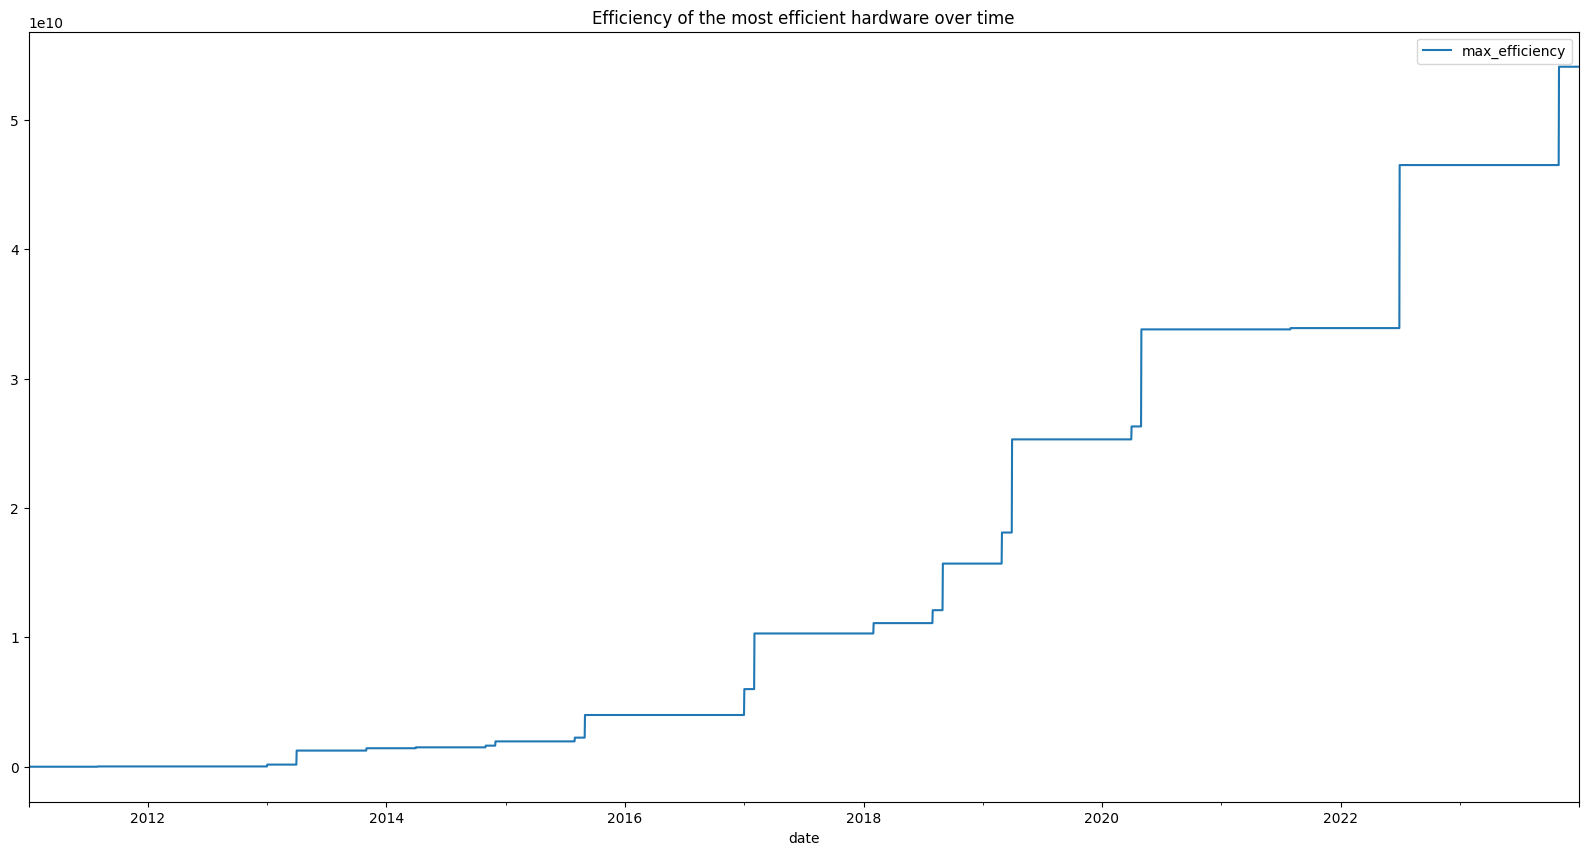

In [111]:
efficiency_df["max_efficiency"] = pd.to_numeric(efficiency_df["max_efficiency"], errors='coerce')
efficiency_df.plot(x='date', y='max_efficiency', figsize=(20, 10), title='Efficiency of the most efficient hardware over time')